# Prerequisites

- [Stream ciphers](https://www.youtube.com/watch?v=9MfeDP0fNDY)
- Semantic security definitions
- One time pad
- [RNG intuition](https://www.youtube.com/watch?v=fEWigU1dcp8)

# Theory PRG

## Definitions

Let $l, L, l<L$ denote the number of bits for some strings

**Problem**:
- producing purelt $L$-bit strings might be ineficient
- Example: In the OTP case, the key must be the same size as the message => we need big keys

**Idea**:
- We want a way to produce $L$-bit strings using $l$-bit seeds using and efficient algorithm

**Definition**  
Let $\mathcal{S} = \{0,1\}^l = $ the seed space, $\mathcal{R} = \{0,1\}^L=$ output space  
Let $G$ be a function (efficient deterministic algorithm) with
- $G: \{0,1\}^l \longrightarrow \{0,1\}^L$
    - G expands $l$-bit strings  to $L$-bit strings
- No efficient algorithm $A$(statistical test) can distinguish $G(s)$ with $s \in \{0,1\}^l$ from a truly random string $r \in \{0,1\}^L$ with better than neglijable advantage:
    $$Pr[A(G(s))=1] - Pr[A(r)=1]|  < \epsilon$$

**Statistical tests**

Let $G:K \longrightarrow \{0,1\}^n$ and define **Advantage** as:
$$\text{Adv}(A, G) = |Pr[A(G(k)) = 1] - Pr[A(k) = 1]| \in [0, 1]$$
- If $\text{Adv} \rightarrow 1$ => $A$ can distinguish from random
- If $\text{Adv} \rightarrow 0$ => $A$ can't distinguish from random

**Example of a bad PRNG**: 
Suppose 
- $msb(G(s)) = 1$ for $2/3$ of $s \in \mathcal S$
- $A(x) = 1 \iff msb(x) = 1$

 Then
- $\text{Adv}_{PRNG}(A,G) = |Pr[A(G(s)) = 1] - Pr[A(r) = 1]| = |2/3 - 1/2| = 1/6$

**PRNG security -- Definition**
: A PRNG is secure if for all effiecient statistical tests $A$ the $\text{Adv}_{PRNG}(A, G)$ is negligible:
$$\text{Adv}_{PRNG}(A, G) = |Pr[A(G(s)) = 1] - Pr[A(r) = 1]| < 
\epsilon$$

## Construction

**Parallel construction**

Let $G$ be a PRG over $(\mathcal{S}, \mathcal{R})$. We construct a PRG $G'$ by concatenating $G$ applied to $n$ seeds
- $G'(s_1, .. s_n) = G(s_1) || ... || G(s_n)$
- If $G$ is secure then $G'$ is secure

**Sequential construction - Blum-Micali**  

Let $G$ be a PRG over $(\mathcal{S}, \mathcal{R} \times \mathcal{S})$. We construct a PRG $G'$ defined over $(\mathcal{S}, \mathcal{R}^n \times \mathcal{S})$
```
G(s) = 
    s_0 = s
    for i = 1  to  n 
            (r_i, s_i) = G(s_{i-1}) 
    return  (r_1, ... r_n, s_n)
```
$F (k, \cdot)$ should — for all practical purposes — “look like” a random function
from X to Y. To make this idea more precise, let us first introduce 
- If $G$ is secure then G' is also secure

Photo from [A graduate course in applied cryptography](http://toc.cryptobook.us/book.pdf)

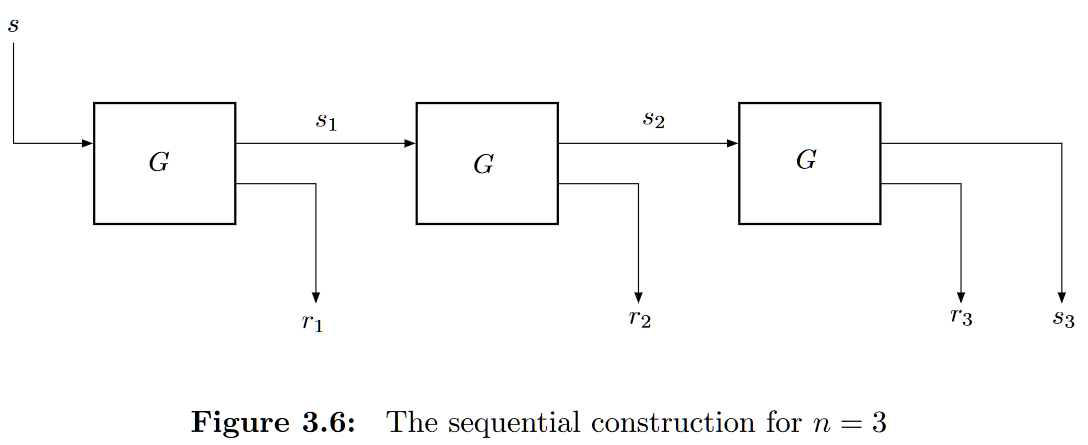
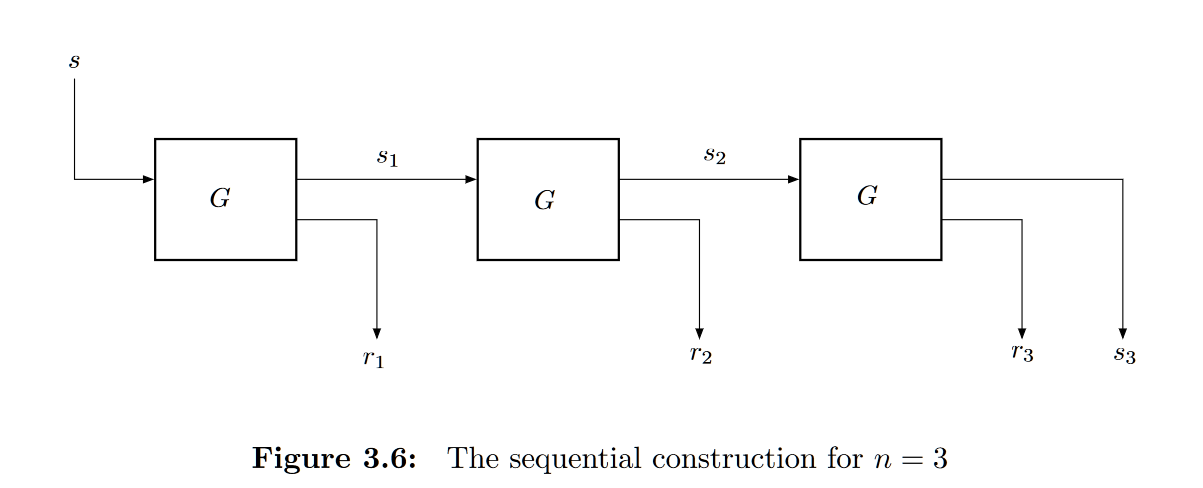

## Unpredictability

**PRNG Unpredictability -- Definition and attack game**  
For a given PRNG $G$, if an attacker is given the first $i$ bits of $G$'s output it cannot predict the next ($i+1$th) bit with probability significantly better than $1/2$. If we can effectively predict the next bit we immediately have an **effective statistical test**.   
Attack game:
- The adversary sends an index $i$ to the challenger
- The challenger computes $s \xleftarrow{R} \mathcal S, r = G(s)$. and sends the first $i$ bits $r[0..i-1]$ to the adversary
- The adversary wins if he guesses the next bit $r[i]$ with a significant probability $> 1/2$

A PRNG is **unpredictable** if the advantage of any efficient adversary is negligible. 

**Theorem**  
If the generator $G$ is secure $\Rightarrow$ a PRNG based on it is unpredictable.

**Theorem**  
An unpredictable PRNG is secure.


# Salsa and ChaCha stream ciphers  + Code

- [Salsa wikipedia](https://en.wikipedia.org/wiki/Salsa20)
- [chacha paper](https://cr.yp.to/chacha/chacha-20080120.pdf)
- https://asecuritysite.com/encryption/salsa20
- https://cr.yp.to/chacha.html

**Structure**
- Padding function $\text{pad}(s, j, 0)$ to form a 512b block
    - $s$ = 128/256b seed
    - $c$ = 32b or 64b block counter
    - $n$ = 64b or 96b nonce
- A fixed public permutation $\pi:\{0, 1\}^{512} \longrightarrow \{0, 1\}^{512}$

**Algorithm**  
The algorithms outputs $L$ pseudorandom blocks of 64 bytes long
- input: seed $s \in \{0,1\}^{256}$
- for $j = 0$ to $L - 1$
    - $h_j = \text{pad}(s, j, n) \in \{0, 1\}^{512}$ //init the state
    - $r_j = \pi(h_j) \oplus h_j$
- output: $(r_0, \dots , r_{L-1})$


Photo from [A graduate course in applied cryptography](http://toc.cryptobook.us/book.pdf)

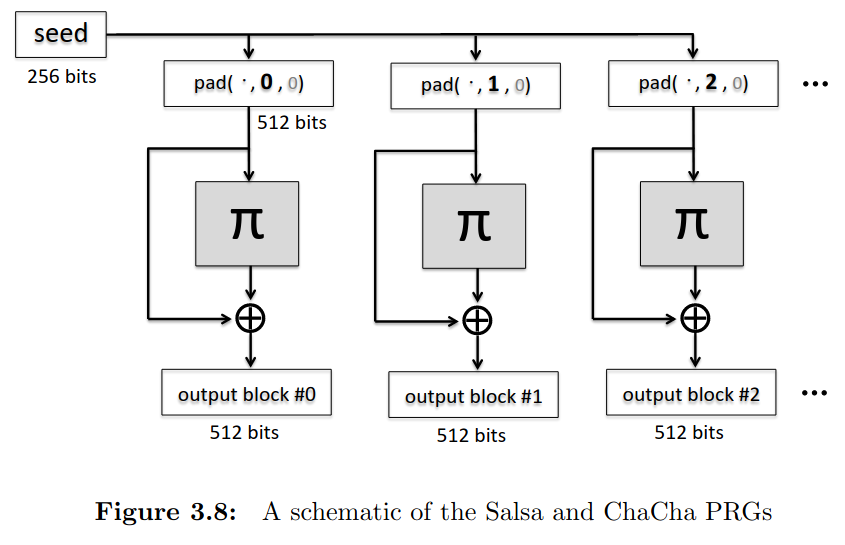

**Note**:
- Highly paralelizable
-  XOR on line 3 is a slightly more complicated operation:  the 512-bit operands $h_j$ and $\pi(h_j)$ are split into 16 wordseach 32-bits long and then added word-wise mod $2^{32}$

The padding function arranges the inputs as follows:
$$\begin{bmatrix}
c_0 & c_1 & c_2 & c_3 \\
s_0 & s_1 & s_2 & s_3 \\ 
s_4 & s_5 & s_6 & s_7 \\ 
c_0 & c_1 & n_0 & n_1 \\ 
\end{bmatrix}
$$
where each entry is an 32b word. 

More about the permutation function can be studied in this [rfc](https://datatracker.ietf.org/doc/html/rfc7539)
The function is based on ARX (add rotate xor). More about the security can be found [here](https://eprint.iacr.org/2022/618.pdf)


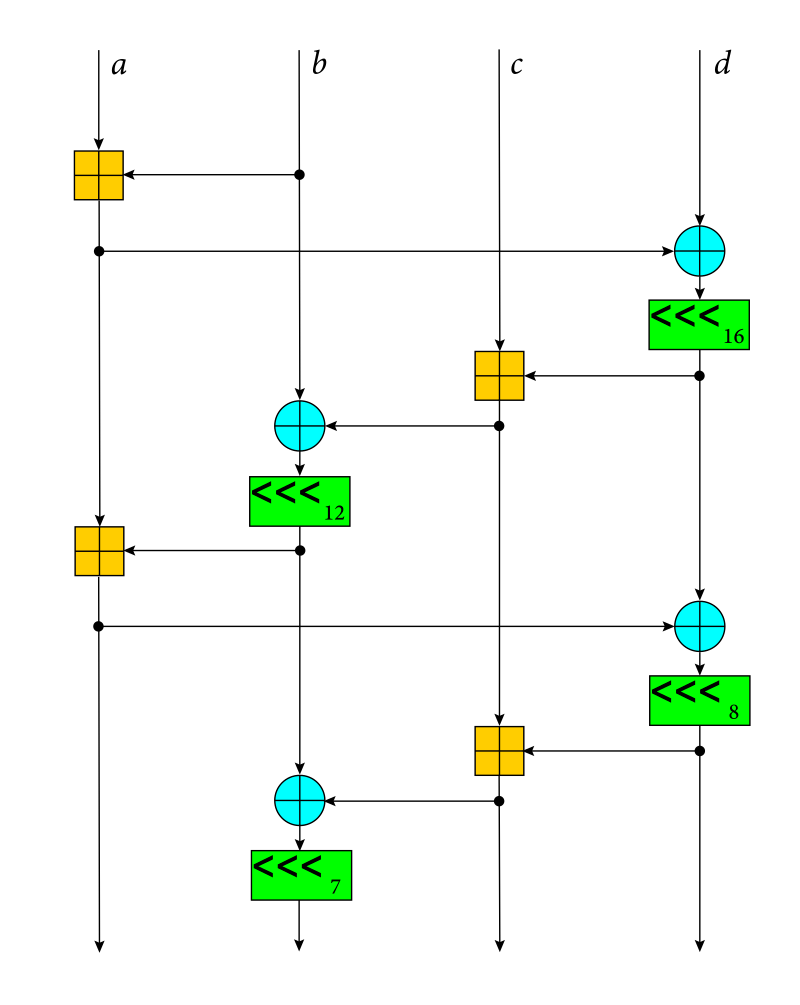

In [1]:
# Implementation after this
# https://datatracker.ietf.org/doc/html/rfc7539

In [2]:
import math
import random
import secrets

from Crypto.Util.number import bytes_to_long, long_to_bytes

In [3]:
# Utility functions


def rotl_32(x: int, b: int) -> int:
    """rotate left x with b bits"""
    return ((x << b) & 0xFFFF_FFFF) | (x >> (32 - b))


def xor_bytes(a: bytes, b: bytes) -> bytes:
    """xor 2 byte arrays"""
    return bytes([aa ^ bb for aa, bb, in zip(a, b)])

In [17]:
def qr(a: int, b: int, c: int, d: int):
    """chacha quarter round, operating on 4 32b uints"""
    a = (a + b) & 0xFFFF_FFFF
    d = d ^ a
    d = rotl_32(d, 16)

    c = (c + d) & 0xFFFF_FFFF
    b = b ^ c
    b = rotl_32(b, 12)

    a = (a + b) & 0xFFFF_FFFF
    d ^= a
    d = rotl_32(d, 8)

    c = (c + d) & 0xFFFF_FFFF
    b = b ^ c
    b = rotl_32(b, 7)

    return a, b, c, d


class ChaCha:
    def __init__(self, key: bytes=None, nonce: bytes=None, blockcount: bytes=None):
        if key is None:
            key = bytes(32)
        if nonce is None:
            nonce = bytes(8)
        if blockcount is None:
            blockcount = bytes([0] * 7 + [1])

        self.rounds = 20
        self.constant = b"expand 32-byte k"
        self.blockcount = blockcount
        self.blockcount_ = blockcount
        self.nonce = nonce
        self.key = key
        self.state = None

    def encrypt(self, message: bytes) -> bytes:
        encrypted_message = b""
        # For each 64 byte block generate the key, xor with the message and add to the encrypted msg.
        for i in range(len(message) // 64):
            k = self.generate_key()
            block = message[i * 64 : (i + 1) * 64]
            encrypted_message = encrypted_message + xor_bytes(block, k)

        # Encrypt last block
        if len(message) % 64 != 0:
            i = len(message) // 64
            k = self.generate_key()
            block = message[i * 64 : len(message)]
            encrypted_message = encrypted_message + xor_bytes(block, k)

        return encrypted_message

    def decrypt(self, ciphertext: bytes) -> bytes:
        return self.encrypt(ciphertext)

    def generate_key(self) -> bytes:
        # get the initial state
        self.init_state()
        s_init = self.state.copy()
        s = self.state

        # do the rounds
        for i in range(0, self.rounds):
            s = self.cha_round(s, i)

        # This addition makes the round uninvertible
        s_fin = [(s_init[i] + s[i]) & 0xFFFF_FFFF for i in range(len(s))]

        # Update state
        self.state = s_fin
        # Increment blockcount
        self.blockcount = long_to_bytes(bytes_to_long(self.blockcount) + 1, 8)

        # Serialize key
        key = b""
        for si in s_fin:
            key = key + si.to_bytes(4, "little")

        return key

    def init_state(self):
        """pads the initial state"""

        # Split bytes into chunks of 4, little endian.
        c = [int.from_bytes(bytes((self.constant[i : i + 4])), "little") for i in range(0, 16, 4)]
        k = [int.from_bytes(bytes((self.key[i : i + 4])), "little") for i in range(0, 32, 4)]
        n = [int.from_bytes(bytes((self.nonce[i : i + 4])), "little") for i in range(0, 12, 4)]
        b = [int.from_bytes(bytes((self.blockcount)), "big")]

        # c = [
        #     bytes_to_long(bytes(reversed(self.constant[i : i + 4]))) for i in range(0, 16, 4)
        # ]  # reversed for little endian?
        # k = [bytes_to_long(bytes(reversed(key[i : i + 4]))) for i in range(0, 32, 4)]
        # n = [bytes_to_long(bytes(reversed(nonce[i : i + 4]))) for i in range(0, 8, 4)]
        # p = [bytes_to_long(bytes(reversed(self.pos[i : i + 4]))) for i in range(0, 8, 4)]

        # Concatenate states into 1 array
        self.state = c + k + b + n
        return self

    def cha_round(self, s: int, i: int):
        """does the i'th cha round"""
        # even round
        if i % 2 == 0:  # this check can be skiped if we do rounds in pairs
            s[0], s[4], s[8], s[12] = qr(s[0], s[4], s[8], s[12])  # 1st column
            s[1], s[5], s[9], s[13] = qr(s[1], s[5], s[9], s[13])  # 2st column
            s[2], s[6], s[10], s[14] = qr(s[2], s[6], s[10], s[14])  # 3st column
            s[3], s[7], s[11], s[15] = qr(s[3], s[7], s[11], s[15])  # 4st column
        # odd round
        else:
            s[0], s[5], s[10], s[15] = qr(s[0], s[5], s[10], s[15])  # 1st diagonal
            s[1], s[6], s[11], s[12] = qr(s[1], s[6], s[11], s[12])  # 2st diagonal
            s[2], s[7], s[8], s[13] = qr(s[2], s[7], s[8], s[13])  # 3st diagonal
            s[3], s[4], s[9], s[14] = qr(s[3], s[4], s[9], s[14])  # 4st diagonal
        return s

    def print_state(self):
        if self.state is not None:
            for i in range(4):
                for j in range(4):
                    print(f"{self.state[i * 4 + j]: 09X}", end=" ")
                print()

In [18]:
# Quarter round test vectors

a = 0x11111111
b = 0x01020304
c = 0x9B8D6F43
d = 0x01234567

a_, b_, c_, d_ = qr(a, b, c, d)

assert a_ == 0xEA2A92F4
assert b_ == 0xCB1CF8CE
assert c_ == 0x4581472E
assert d_ == 0x5881C4BB

In [19]:
# Key
# key = long_to_bytes(0x000102030405060708090A0B0C0D0E0F101112131415161718191A1B1C1D1E1F, 32)
key = bytes([i for i in range(32)])
nonce = (0x000000090000004A00000000).to_bytes(12, "big")
blockcount = (1).to_bytes(4, "big")
chacha = ChaCha(key, nonce, blockcount)

chacha.init_state()
chacha.print_state()

keystream = chacha.generate_key()
print()
chacha.print_state()

# e4e7f110  15593bd1  1fdd0f50  c47120a3
# c7f4d1c7  0368c033  9aaa2204  4e6cd4c3
# 466482d2  09aa9f07  05d7c214  a2028bd9
# d19c12b5  b94e16de  e883d0cb  4e3c50a2

 61707865  3320646E  79622D32  6B206574 
 03020100  07060504  0B0A0908  0F0E0D0C 
 13121110  17161514  1B1A1918  1F1E1D1C 
 00000001  09000000  4A000000  00000000 

 E4E7F110  15593BD1  1FDD0F50  C47120A3 
 C7F4D1C7  0368C033  9AAA2204  4E6CD4C3 
 466482D2  09AA9F07  05D7C214  A2028BD9 
 D19C12B5  B94E16DE  E883D0CB  4E3C50A2 


In [20]:
serial = bytes(
    [
        0x10,
        0xF1,
        0xE7,
        0xE4,
        0xD1,
        0x3B,
        0x59,
        0x15,
        0x50,
        0x0F,
        0xDD,
        0x1F,
        0xA3,
        0x20,
        0x71,
        0xC4,
        0xC7,
        0xD1,
        0xF4,
        0xC7,
        0x33,
        0xC0,
        0x68,
        0x03,
        0x04,
        0x22,
        0xAA,
        0x9A,
        0xC3,
        0xD4,
        0x6C,
        0x4E,
        0xD2,
        0x82,
        0x64,
        0x46,
        0x07,
        0x9F,
        0xAA,
        0x09,
        0x14,
        0xC2,
        0xD7,
        0x05,
        0xD9,
        0x8B,
        0x02,
        0xA2,
        0xB5,
        0x12,
        0x9C,
        0xD1,
        0xDE,
        0x16,
        0x4E,
        0xB9,
        0xCB,
        0xD0,
        0x83,
        0xE8,
        0xA2,
        0x50,
        0x3C,
        0x4E,
    ]
)
assert serial == keystream

In [21]:
key = b"this very secret key has 32bytes"
nonce = secrets.token_bytes(8)  # or set this to 0

In [22]:
chacha = ChaCha(key=key, nonce=nonce)
chacha.init_state()
chacha.print_state()

 61707865  3320646E  79622D32  6B206574 
 73696874  72657620  65732079  74657263 
 79656B20  73616820  62323320  73657479 
 00000001  EC9C7A96  34DEFE8B  00000000 


In [23]:
key, nonce

(b'this very secret key has 32bytes', b'\x96z\x9c\xec\x8b\xfe\xde4')

In [24]:
chacha = ChaCha(key=key, nonce=nonce)
message = b"this is a very secret message"
c = chacha.encrypt(message)
print(c)
print(len(message), len(c))

b'\x05\xc2\xbd\x91\xb2\xab\x01h\x8e\xec\xec\xa6\xc3\x1b\xfb\x05A7\xfd\xe2\x8dn\xa1>\x02hY\x85\x88'
29 29


In [25]:
chacha = ChaCha(key=key, nonce=nonce)
m_decr = chacha.decrypt(c)
m_decr

b'this is a very secret message'

In [26]:
key = bytes([i for i in range(32)])
nonce = (0x000000000000004A00000000).to_bytes(12, "big")
blockcount = (1).to_bytes(4, "big")
message = b"Ladies and Gentlemen of the class of '99: If I could offer you only one tip for the future, sunscreen would be it."
chacha = ChaCha(key, nonce, blockcount)
c = chacha.encrypt(message)

In [27]:
c

b'n.5\x9a%h\xf9\x80A\xba\x07(\xdd\ri\x81\xe9~z\xec\x1dC`\xc2\n\'\xaf\xcc\xfd\x9f\xae\x0b\xf9\x1be\xc5RG3\xab\x8fY=\xab\xcdb\xb3W\x169\xd6$\xe6QR\xab\x8fS\x0c5\x9f\x08a\xd8\x07\xca\r\xbfP\rjaV\xa3\x8e\x08\x8a"\xb6^R\xbcQM\x16\xcc\xf8\x06\x81\x8c\xe9\x1a\xb7y76Z\xf9\x0b\xbft\xa3[\xe6\xb4\x0b\x8e\xed\xf2x^B\x87M'

In [28]:
c_ = bytes(
    [
        0x6E,
        0x2E,
        0x35,
        0x9A,
        0x25,
        0x68,
        0xF9,
        0x80,
        0x41,
        0xBA,
        0x07,
        0x28,
        0xDD,
        0x0D,
        0x69,
        0x81,
        0xE9,
        0x7E,
        0x7A,
        0xEC,
        0x1D,
        0x43,
        0x60,
        0xC2,
        0x0A,
        0x27,
        0xAF,
        0xCC,
        0xFD,
        0x9F,
        0xAE,
        0x0B,
        0xF9,
        0x1B,
        0x65,
        0xC5,
        0x52,
        0x47,
        0x33,
        0xAB,
        0x8F,
        0x59,
        0x3D,
        0xAB,
        0xCD,
        0x62,
        0xB3,
        0x57,
        0x16,
        0x39,
        0xD6,
        0x24,
        0xE6,
        0x51,
        0x52,
        0xAB,
        0x8F,
        0x53,
        0x0C,
        0x35,
        0x9F,
        0x08,
        0x61,
        0xD8,
        0x07,
        0xCA,
        0x0D,
        0xBF,
        0x50,
        0x0D,
        0x6A,
        0x61,
        0x56,
        0xA3,
        0x8E,
        0x08,
        0x8A,
        0x22,
        0xB6,
        0x5E,
        0x52,
        0xBC,
        0x51,
        0x4D,
        0x16,
        0xCC,
        0xF8,
        0x06,
        0x81,
        0x8C,
        0xE9,
        0x1A,
        0xB7,
        0x79,
        0x37,
        0x36,
        0x5A,
        0xF9,
        0x0B,
        0xBF,
        0x74,
        0xA3,
        0x5B,
        0xE6,
        0xB4,
        0x0B,
        0x8E,
        0xED,
        0xF2,
        0x78,
        0x5E,
        0x42,
        0x87,
        0x4D,
    ]
)
assert c == c_

In [29]:
chacha = ChaCha(key, nonce, blockcount)
m_decr = chacha.decrypt(c)
assert m_decr == message